In [4]:
import os
import sys
import glob
import argparse

import numpy as np
from tqdm import tqdm
import cv2
import random

import matplotlib.pyplot as plt

from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.applications.inception_v3 import *
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline   

DIR_TEST_NEW  = './data/test_new'
DIR_TEST  = './data/test'
IMAGE_SIZE    = (299, 299)
WEIGHTS_FINAL = 'model-InceptionV3-final.h5'
DIR_OUTPUT = './data/output'

In [5]:
# load the trained model
net = load_model(WEIGHTS_FINAL)

In [2]:
print(DIR_TEST_NEW)

./data/test_new


In [70]:
# prepare data for submission
# 参考：https://www.kaggle.com/josecyn/dogs-vs-cats-inceptionv3-w-keras

submission_imgs = [img for img in filter(lambda x:x.endswith('JPG') or x.endswith('jpg'), os.listdir(DIR_TEST))]
submission_x = submission_imgs[:]
print ("Number of submission examples = {}".format(len(submission_x)))
submission_imgs = sorted(submission_imgs, key=lambda x: int(x[:x.index('.')]))

#print(submission_imgs)

Number of submission examples = 12500


In [6]:
def predictFromPath(path):
    img = image.load_img(path, target_size=(299,299))
    if img is None:
        return
    x = image.img_to_array(img)
    x = preprocess_input(x)
    x = np.expand_dims(x, axis=0)

    pred = net.predict(x).clip(min=0.005, max=0.995)
    
    return pred[0][1]

In [7]:
# 随机预测图片看效果DIR_TEST_NEW
test_images = [img for img in filter(lambda x:x.endswith('JPG') or x.endswith('jpg'), os.listdir(DIR_TEST_NEW))]
print(len(test_images))

60


In [15]:
# 随机打印集合中的图片 4 x 4
def random_print_16_images_result(files, path, size):
    plt.style.use('seaborn-white')
    random.seed(50)

    fig,ax = plt.subplots(4,4,sharex='col',sharey='row',figsize=(16,16))

    #随机获取图片 4x4
    for i in range(4):
        for j in range(4):
            index = random.randint(0,size)
            f = os.path.join(path,files[index]);
            
            res = predictFromPath(f)
            title = ''
            if res > 0.5:
                title = 'Dog: {:.6f}'.format(res)
            else:
                title = 'Cat: {:.6f}'.format(1 - res)
                
            img = cv2.imread(f)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax[i,j].set_title(title)
            ax[i,j].imshow(img)

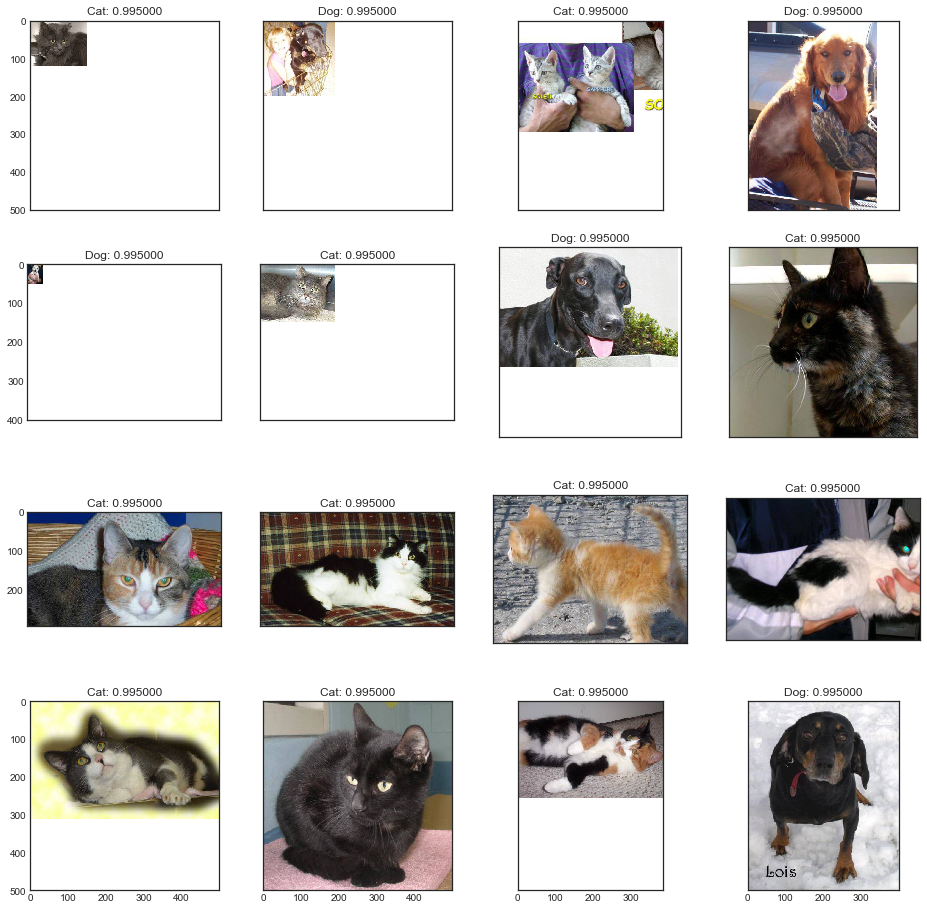

In [16]:
random_print_16_images_result(test_images, DIR_TEST_NEW, 60)

In [73]:
import csv
from tqdm import tqdm

if not os.path.exists(DIR_OUTPUT):
    os.mkdir(DIR_OUTPUT)

with open(os.path.join(DIR_OUTPUT,'submission.csv'), 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['id', 'label'])
    
    for elem in tqdm (submission_imgs):
        f = os.path.join(DIR_TEST, elem)
        prediction = predictFromPath(f)
        filewriter.writerow([elem[:elem.index('.')], "{:.6f}".format(prediction)])

100%|██████████| 12500/12500 [33:55<00:00,  6.11it/s]
